<a href="https://colab.research.google.com/github/neiroYakoV/Ingate_SEO_n/blob/main/Yakovenko%20Vadim/%D1%80%D0%B5%D0%B7%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA%D0%BE%D0%BC%D0%BC%D0%B5%D1%80%D1%87_%2C_%D0%BD%D0%B5%D0%BA%D0%BE%D0%BC%D0%BC%D0%B5%D1%80%D1%87_%D0%B7%D0%B0%D0%BF%D1%80%D0%BE%D1%81%D0%BE%D0%B2%2C_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_BOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Работа с массивами данных
import numpy as np

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Загрузка датасетов из облака google
import gdown

# Функции операционной системы
import os

# Работа со временем
import time

# Регулярные выражения
import re

# Запись в файлы и чтение из файлов структур данных Python
import pickle

# Отрисовка графиков
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Загрузка датасета из облака
gdown.download('https://drive.google.com/uc?id=1BntFDfOfDvyPqwiSFA1D4Yp99aAvy8y-', None, quiet=True)

'Data.zip'

In [ ]:
# Распаковка архива в папку writers
!unzip -qo Data.zip -d Data/

# Просмотр содержимого папки
!ls Data

'(Коммерческие) Обучающая_5 вместе.txt'  '(Некоммерческие) Обучающая_5 вместе.txt'
'(Коммерческие) Тестовая_2 вместе.txt'	 '(Некоммерческие) Тестовая_2 вместе.txt'


In [ ]:
# Настройка констант для загрузки данных
FILE_DIR  = 'Data'                         # Папка с текстовыми файлами
SIG_TRAIN = 'обучающая'                   # Признак обучающей выборки в имени файла
SIG_TEST  = 'тестовая'                    # Признак тестовой выборки в имени файла

In [ ]:
# Загрузка датасета. Добавляются имена классов и соответствующие тексты.
# Все тексты преобразуются в строку и объединяются для каждого класса и выборки
CLASS_LIST = []
text_train = []
text_test = []

for file_name in os.listdir(FILE_DIR):
    # Выделение имени класса и типа выборки из имени файла
    m = re.match('\((.+)\) (\S+)_', file_name)
    # Если выделение получилось, то файл обрабатывается
    if m:
        class_name = m[1]
        subset_name = m[2].lower()
        # Проверка типа выборки в имени файла
        is_train = SIG_TRAIN in subset_name
        is_test = SIG_TEST in subset_name

        # Если тип выборки обучающая либо тестовая - файл обрабатывается
        if is_train or is_test:
            # Добавление нового класса, если его еще нет в списке
            if class_name not in CLASS_LIST:
                print(f'Добавление класса "{class_name}"')
                CLASS_LIST.append(class_name)
                # Инициализация соответствующих классу строк текста
                text_train.append('')
                text_test.append('')

            # Поиск индекса класса для добавления содержимого файла в выборку
            cls = CLASS_LIST.index(class_name)
            print(f'Добавление файла "{file_name}" в класс "{CLASS_LIST[cls]}", {subset_name} выборка.')
            with open(f'{FILE_DIR}/{file_name}', 'r') as f:
                # Загрузка содержимого файла в строку
                text = f.read()
            # Определение выборки, куда будет добавлено содержимое
            subset = text_train if is_train else text_test
            # Добавление текста к соответствующей выборке класса. Концы строк заменяются на пробел
            subset[cls] += ' ' + text.replace('\n', ' ')

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

Добавление класса "Коммерческие"
Добавление файла "(Коммерческие) Обучающая_5 вместе.txt" в класс "Коммерческие", обучающая выборка.
Добавление класса "Некоммерческие"
Добавление файла "(Некоммерческие) Обучающая_5 вместе.txt" в класс "Некоммерческие", обучающая выборка.
Добавление файла "(Коммерческие) Тестовая_2 вместе.txt" в класс "Коммерческие", тестовая выборка.
Добавление файла "(Некоммерческие) Тестовая_2 вместе.txt" в класс "Некоммерческие", тестовая выборка.


In [ ]:
# Прочитанные классы текстов
print(CLASS_LIST)

# Количество текстов в обучающей выборке
print(len(text_train))

# Количество символов в одном из текстов обучающей выборки
print(len(text_train[0]))

['Коммерческие', 'Некоммерческие']
2
11648


In [ ]:
# Проверка загрузки: вывод начальных отрывков из каждого класса
for cls in range(CLASS_COUNT):
    print(f'Класс: {CLASS_LIST[cls]}')
    print(f'  train: {text_train[cls][:200]}')
    print(f'  test : {text_test[cls][:200]}')
    print()

Класс: Коммерческие
  train:  Купить косметику онлайн Заказать пиццу с доставкой Купить книгу по философии Бронирование гостиницы в центре города Подарки для женщин на 8 марта Аренда автомобиля без водителя Купить кроссовки Nike 
  test :  Где купить хлеб в Киеве Сравнение цен на автомобили в 2022 году Суши с доставкой на дом Промо-код для покупки телевизора Скидки на микроволновую печь  Покупка шубы онлайн Рейтинг смартфонов  Где можн

Класс: Некоммерческие
  train:  Как стать волонтером в местной благотворительной организации? Где можно найти информацию о бесплатных образовательных программах? Какой некоммерческий фонд помогает людям с ограниченными возможностям
  test :  Какие программы благотворительный фонд предлагает для борьбы с голодом в Африке? Почему небо синее? Какого цвета становится небо в ночное время? Почему небо иногда бывает оранжевым или красным в зака



In [ ]:
# Задание параметров преобразования
VOCAB_SIZE = 200                       # Объем словаря для токенизатора
WIN_SIZE   = 8                          # Длина отрезка текста (окна) в словах
WIN_HOP    = 2                         # Шаг окна разбиения текста на векторы

In [ ]:
# Контекстный менеджер для измерения времени операций
# Операция обертывается менеджером с помощью оператора with
class timex:
    def __enter__(self):
        # Фиксация времени старта процесса
        self.t = time.time()
        return self

    def __exit__(self, type, value, traceback):
        # Вывод времени работы
        print('Время обработки: {:.2f} с'.format(time.time() - self.t))

In [ ]:
# Токенизация и построение частотного словаря по обучающим текстам
with timex():
    # Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
    tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
                          lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

    # Использованы параметры:
    # num_words   - объем словаря
    # filters     - убираемые из текста ненужные символы
    # lower       - приведение слов к нижнему регистру
    # split       - разделитель слов
    # char_level  - указание разделять по словам, а не по единичным символам
    # oov_token   - токен для слов, которые не вошли в словарь

    # Построение частотного словаря по обучающим текстам
    tokenizer.fit_on_texts(text_train)

    # Построение словаря в виде пар слово - индекс
    items = list(tokenizer.word_index.items())

Время обработки: 0.01 с


In [ ]:
# Вывод нескольких наиболее часто встречающихся слов
print(items[:120])

# Размер словаря может быть больше, чем num_words, но при преобразовании в последовательности
# и векторы bag of words будут учтены только первые num_words слов
print("Размер словаря", len(items))

[('неизвестное_слово', 1), ('для', 2), ('на', 3), ('купить', 4), ('как', 5), ('заказать', 6), ('в', 7), ('услуги', 8), ('по', 9), ('где', 10), ('и', 11), ('о', 12), ('какие', 13), ('билеты', 14), ('найти', 15), ('какой', 16), ('у', 17), ('с', 18), ('можно', 19), ('оформить', 20), ('подарок', 21), ('выбрать', 22), ('информацию', 23), ('есть', 24), ('из', 25), ('лучшие', 26), ('почему', 27), ('дома', 28), ('зачем', 29), ('подписку', 30), ('некоммерческом', 31), ('помощи', 32), ('центре', 33), ('без', 34), ('что', 35), ('некоммерческий', 36), ('фонд', 37), ('факты', 38), ('онлайн', 39), ('организации', 40), ('помогает', 41), ('некоммерческие', 42), ('а', 43), ('бронирование', 44), ('новый', 45), ('предложения', 46), ('программы', 47), ('страховка', 48), ('одежду', 49), ('свадьбу', 50), ('поиск', 51), ('советы', 52), ('внутри', 53), ('мебель', 54), ('такие', 55), ('автомобиль', 56), ('от', 57), ('за', 58), ('стать', 59), ('некоммерческой', 60), ('создать', 61), ('существуют', 62), ('сделат

In [ ]:
# Преобразование обучающих и проверочных текстов в последовательность индексов согласно частотному словарю
with timex():
    seq_train = tokenizer.texts_to_sequences(text_train)
    seq_test = tokenizer.texts_to_sequences(text_test)

    print("Фрагмент обучающего текста:")
    print("В виде оригинального текста:              ", text_train[1][:101])
    print("Он же в виде последовательности индексов: ", seq_train[1][:20])

Фрагмент обучающего текста:
В виде оригинального текста:                Как стать волонтером в местной благотворительной организации? Где можно найти информацию о бесплатны
Он же в виде последовательности индексов:  [5, 59, 174, 7, 175, 1, 40, 10, 19, 15, 23, 12, 1, 1, 1, 16, 36, 37, 41, 125]
Время обработки: 0.01 с


In [ ]:
# Функция вывода статистики по текстам
def print_text_stats(title, texts, sequences, class_labels=CLASS_LIST):
    # Суммарное количество символов и слов в тексте
    chars = 0
    words = 0

    print(f'Статистика по {title} текстам:')

    # Вывод итогов по всем классам данного набора текстов и их последовательностей индексов
    for cls in range(len(class_labels)):
        print('{:<15} {:9} символов,{:8} слов'.format(class_labels[cls],
                                                      len(texts[cls]),
                                                      len(sequences[cls])))
        chars += len(texts[cls])
        words += len(sequences[cls])

    print('----')
    print('{:<15} {:9} символов,{:8} слов\n'.format('В сумме', chars, words))

# Вывод итогов по текстам
print_text_stats('обучающим', text_train, seq_train)
print_text_stats('тестовым', text_test, seq_test)

Статистика по обучающим текстам:
Коммерческие        11648 символов,    1538 слов
Некоммерческие      12134 символов,    1627 слов
----
В сумме             23782 символов,    3165 слов

Статистика по тестовым текстам:
Коммерческие          766 символов,     115 слов
Некоммерческие       1219 символов,     172 слов
----
В сумме              1985 символов,     287 слов



In [ ]:
# Функция разбиения последовательности на отрезки скользящим окном
# На входе - последовательность индексов, размер окна, шаг окна
def split_sequence(sequence, win_size, hop):
    # Последовательность разбивается на части до последнего полного окна
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, hop)]


# Функция формирования выборок из последовательностей индексов
# формирует выборку отрезков и соответствующих им меток классов в виде one hot encoding
def vectorize_sequence(seq_list, win_size, hop):
    # В списке последовательности следуют в порядке их классов
    # Всего последовательностей в списке ровно столько, сколько классов
    class_count = len(seq_list)

    # Списки для исходных векторов и категориальных меток класса
    x, y = [], []

    # Для каждого класса:
    for cls in range(class_count):
        # Разбиение последовательности класса cls на отрезки
        vectors = split_sequence(seq_list[cls], win_size, hop)
        # Добавление отрезков в выборку
        x += vectors
        # Для всех отрезков класса cls добавление меток класса в виде OHE
        y += [utils.to_categorical(cls, class_count)] * len(vectors)

    # Возврат результатов как numpy-массивов
    return np.array(x), np.array(y)

In [ ]:
# Формирование обучающей и тестовой выборок
with timex():
    # Формирование обучающей выборки
    x_train, y_train = vectorize_sequence(seq_train, WIN_SIZE, WIN_HOP)
    # Формирование тестовой выборки
    x_test, y_test = vectorize_sequence(seq_test, WIN_SIZE, WIN_HOP)

    # Проверка формы сформированных данных
    print(x_train.shape, y_train.shape)
    print(x_test.shape, y_test.shape)

(1576, 8) (1576, 2)
(137, 8) (137, 2)
Время обработки: 0.25 с


In [ ]:
# Вывод отрезка индексов тренировочной выборки
print(x_train[0])

[  4   1  39   6 131  18  69   4]


In [ ]:
# Формирование выборок текстов в виде разреженных матриц (bag of words)
with timex():
    # На входе .sequences_to_matrix() ожидает список, .tolist() выполняет преобразование типа
    x_train_01 = tokenizer.sequences_to_matrix(x_train.tolist())
    x_test_01 = tokenizer.sequences_to_matrix(x_test.tolist())

    # Вывод формы обучающей выборки в виде разреженной матрицы Bag of Words
    print(x_train_01.shape)
    # Вывод фрагмента отрезка обучающего текста в виде Bag of Words
    print(x_train_01[0][0:100])

(1576, 200)
[0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Время обработки: 0.02 с


In [ ]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model,
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=40,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', save_best_only=True)

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        callbacks=[checkpoint_callback])

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'],
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=CLASS_LIST,
                             title='',
                             optimizer='adam',
                             epochs=40,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):

    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model,
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test,
               class_labels=class_labels,
               title=title,
               figsize=cm_size)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 26)                5226      
                                                                 
 dropout_6 (Dropout)         (None, 26)                0         
                                                                 
 batch_normalization_3 (Bat  (None, 26)                104       
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 4)                 108       
                                                                 
 dropout_7 (Dropout)         (None, 4)                 0         
                                                                 
 dense_11 (Dense)            (None, 2)                 10        
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 0s 16ms/step - loss: 0.7177 - accuracy: 0.5076 - val_loss: 0.6913 - val_accuracy: 0.7372
Epoch 3/40
13/13 [==============================] - 0s 19ms/step - loss: 0.6954 - accuracy: 0.6123 - val_loss: 0.6890 - val_accuracy: 0.8467
Epoch 4/40
13/13 [==============================] - 0s 15ms/step - loss: 0.6741 - accuracy: 0.7119 - val_loss: 0.6859 - val_accuracy: 0.8832
Epoch 5/40
13/13 [==============================] - 0s 28ms/step - loss: 0.6548 - accuracy: 0.7329 - val_loss: 0.6813 - val_accuracy: 0.9051
Epoch 6/40
13/13 [==============================] - 0s 29ms/step - loss: 0.6239 - accuracy: 0.8211 - val_loss: 0.6743 - val_accuracy: 0.9051
Epoch 7/40
13/13 [==============================] - 0s 17ms/step - loss: 0.6028 - accuracy: 0.8522 - val_loss: 0.6645 - val_accuracy: 0.9197
Epoch 8/40
13/13 [==============================] - 0s 22ms/step - loss: 0.5711 - accuracy: 0.8693 - val_loss: 0.6521 - val_accuracy: 0.8978
Epoch 9/40
13/13 [======

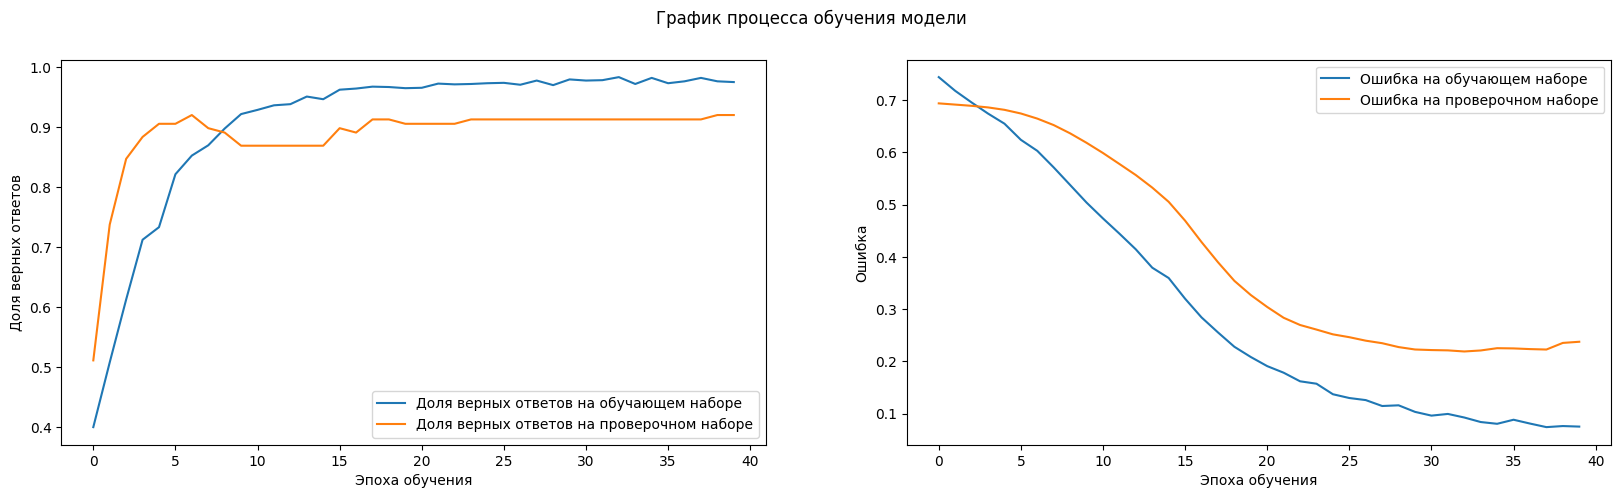

5/5 [==============================] - 0s 5ms/step


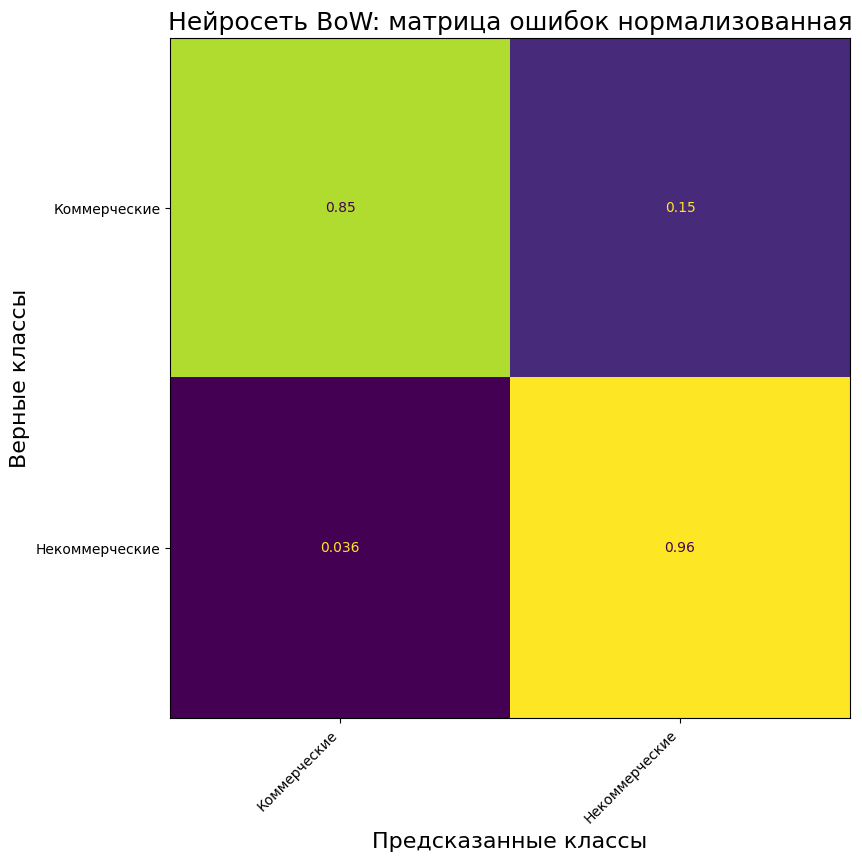

----------------------------------------------------------------------------------------------------
Нейросеть: BoW
Класс: Коммерческие          85% сеть отнесла к классу Коммерческие         - ВЕРНО :-)
Класс: Некоммерческие        96% сеть отнесла к классу Некоммерческие       - ВЕРНО :-)

Средняя точность распознавания:  91%


In [ ]:
# Создание последовательной модели нейросети
model_text_bow_softmax = Sequential()
# Первый полносвязный слой
model_text_bow_softmax.add(Dense(26, input_dim=VOCAB_SIZE, activation="relu"))
# Слой регуляризации Dropout
model_text_bow_softmax.add(Dropout(0.2))
# Слой пакетной нормализации
model_text_bow_softmax.add(BatchNormalization())
model_text_bow_softmax.add(Dense(4,activation="relu"))
model_text_bow_softmax.add(Dropout(0.2))
# Выходной полносвязный слой
model_text_bow_softmax.add(Dense(CLASS_COUNT, activation='sigmoid'))

# Входные данные подаются в виде векторов bag of words
compile_train_eval_model(model_text_bow_softmax,
                         x_train_01, y_train,
                         x_test_01, y_test,
                         class_labels=CLASS_LIST,
                         title='BoW')

In [ ]:
# Сохранение полной модели (архитектуры слоев и весов каждого слоя)
# Для чтения модели используется метод keras.models.load_model()
model_text_bow_softmax.save('model_text_bow_softmax.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
load_model('model_text_bow_softmax.h5')
